In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

day = pd.read_csv('/Users/galvanize/Documents/regression/day.csv')

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [3]:
hour = pd.read_csv('/Users/galvanize/Documents/regression/hour.csv')

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
import statsmodels.api as sm
X = pd.DataFrame({'holiday' : hour['holiday'], 'season': hour['season'], 
                  'hour' : hour['hr']})
X

,holiday,season,hour
0,0,1,0
1,0,1,1
2,0,1,2
3,0,1,3
4,0,1,4
...,...,...,...
17374,0,1,19
17375,0,1,20
17376,0,1,21
17377,0,1,22


In [10]:
X = sm.add_constant(X)
X

/Users/galvanize/ENTER/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,holiday,season,hour
0,1.0,0,1,0
1,1.0,0,1,1
2,1.0,0,1,2
3,1.0,0,1,3
4,1.0,0,1,4
...,...,...,...,...
17374,1.0,0,1,19
17375,1.0,0,1,20
17376,1.0,0,1,21
17377,1.0,0,1,22


In [11]:
Y = hour['temp']

In [12]:
regressor = sm.OLS(Y,X)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     770.5
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:30:30   Log-Likelihood:                 5055.7
No. Observations:               17379   AIC:                        -1.010e+04
Df Residuals:                   17375   BIC:                        -1.007e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3169      0.004     77.050      0.000       0.309       0.325
holiday       -0.0281      0.008     -3.425      0.001      -0.044      -0.012
season         0.0544      0.001     43.864      0.000       0.052       0.057
hour           0.0039      0.000     19.577      0.000       0.003       0.004
==============================================================================
Omnibus:                     3809.892   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              712.517
Skew:                          -0.006   Prob(JB):                    1.90e-155
Kurtosis:                       2.008   Cond. No.                         81.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
outside = pd.DataFrame({'wind speed' : hour['windspeed'], 'temperature': hour['temp'], 
                  'real feel' : hour['atemp']})
outside

,wind speed,temperature,real feel
0,0.0000,0.24,0.2879
1,0.0000,0.22,0.2727
2,0.0000,0.22,0.2727
3,0.0000,0.24,0.2879
4,0.0000,0.24,0.2879
...,...,...,...
17374,0.1642,0.26,0.2576
17375,0.1642,0.26,0.2576
17376,0.1642,0.26,0.2576
17377,0.1343,0.26,0.2727


In [14]:
riders = hour['casual']
riders

0         3
1         8
2         5
3         3
4         0
         ..
17374    11
17375     8
17376     7
17377    13
17378    12
Name: casual, Length: 17379, dtype: int64

In [15]:
regressor = sm.OLS(riders,outside)
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 casual   R-squared (uncentered):                   0.468
Model:                            OLS   Adj. R-squared (uncentered):              0.468
Method:                 Least Squares   F-statistic:                              5088.
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:38:57   Log-Likelihood:                         -90584.
No. Observations:               17379   AIC:                                  1.812e+05
Df Residuals:                   17376   BIC:                                  1.812e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
wind speed      1.9065      2.381      0.801      0.423      -2.760       6.573
temperature   193.2469     10.612     18.209      0.000     172.446     214.048
real feel    -122.5450     11.178    -10.963      0.000    -144.455    -100.635
==============================================================================
Omnibus:                     9989.748   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86921.981
Skew:                           2.692   Prob(JB):                         0.00
Kurtosis:                      12.542   Cond. No.                         34.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

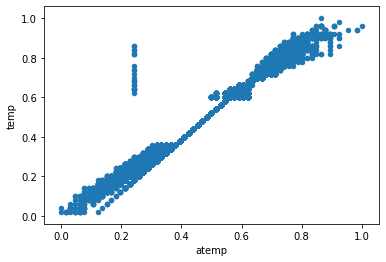

In [18]:
hour.plot('atemp','temp',kind='scatter')

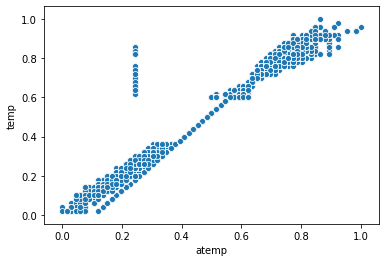

In [23]:
import seaborn as sns
ax = sns.scatterplot(x="atemp", y="temp", data=hour)

In [24]:
regressor = sm.OLS(hour['atemp'],hour['temp'])
regressor = regressor.fit()
regressor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  atemp   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          4.874e+06
Date:                Mon, 18 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:51:30   Log-Likelihood:                          36193.
No. Observations:               17379   AIC:                                 -7.238e+04
Df Residuals:                   17378   BIC:                                 -7.238e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           0.9474      0.000   2207.759      0.000       0.947       0.948
==============================================================================
Omnibus:                    19215.432   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5069566.004
Skew:                          -5.255   Prob(JB):                         0.00
Kurtosis:                      86.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
import statsmodels.formula.api as smf


formula = 'casual ~ windspeed + temp + atemp + C(holiday) + C(workingday) + C(season)'

fitted_model = smf.ols(formula=formula, data=hour).fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     1197.
Date:                Tue, 19 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:20:23   Log-Likelihood:                -88586.
No. Observations:               17379   AIC:                         1.772e+05
Df Residuals:                   17370   BIC:                         1.773e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -18.4289      1.265    -14.566      0.000     -20.909     -15.949
C(holiday)[T.1]      -13.3336      1.859     -7.171      0.000     -16.978      -9.689
C(workingday)[T.1]   -36.1586      0.668    -54.120      0.000     -37.468     -34.849
C(season)[T.2]        -7.6603      1.056     -7.257      0.000      -9.729      -5.591
C(season)[T.3]       -29.3819      1.348    -21.789      0.000     -32.025     -26.739
C(season)[T.4]        -2.3109      0.926     -2.495      0.013      -4.126      -0.495
windspeed             32.6334      2.583     12.635      0.000      27.571      37.696
temp                 165.1448     10.783     15.315      0.000     144.008     186.281
atemp                  2.1100     11.702      0.180      0.857     -20.827      25.047
==============================================================================
Omnibus:                     7067.177   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42961.238
Skew:                           1.853   Prob(JB):                         0.00
Kurtosis:                       9.752   Cond. No.                         79.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""